In [14]:
from __future__ import print_function, division

import numpy as np
import random

import first
import normal
import thinkstats2
import thinkplot


In [1]:
class Normal(object):
    """Represents a Normal distribution"""

    def __init__(self, mu, sigma2, label=''):
        """Initializes.

        mu: mean
        sigma2: variance
        """
        self.mu = mu
        self.sigma2 = sigma2
        self.label = label

    def __str__(self):
        """Returns a string representation."""
        return 'N(%g, %g)' % (self.mu, self.sigma2)

    @property
    def sigma(self):
        """Returns the standard deviation."""
        return math.sqrt(self.sigma2)

    def __add__(self, other):
        """Adds a number or other Normal.

        other: number or Normal

        returns: new Normal
        """
        if isinstance(other, Normal):
            return Normal(self.mu + other.mu, self.sigma2 + other.sigma2)
        else:
            return Normal(self.mu + other, self.sigma2)

    __radd__ = __add__

    def __sub__(self, other):
        """Subtracts a number or other Normal.

        other: number or Normal

        returns: new Normal
        """
        if isinstance(other, Normal):
            return Normal(self.mu - other.mu, self.sigma2 + other.sigma2)
        else:
            return Normal(self.mu - other, self.sigma2)

    __rsub__ = __sub__

    def __mul__(self, factor):
        """Multiplies by a scalar.

        factor: number

        returns: new Normal
        """
        return Normal(factor * self.mu, factor**2 * self.sigma2)

    __rmul__ = __mul__

    def __div__(self, divisor):
        """Divides by a scalar.

        divisor: number

        returns: new Normal
        """
        return 1.0 / divisor * self

    __truediv__ = __div__

    def Sum(self, n):
        """Returns the distribution of the sum of n values.

        n: int

        returns: new Normal
        """
        return Normal(n * self.mu, n * self.sigma2)

    def Render(self):
        """Returns pair of xs, ys suitable for plotting.
        """
        mean, std = self.mu, self.sigma
        low, high = mean - 3 * std, mean + 3 * std
        xs, ys = thinkstats2.RenderNormalCdf(mean, std, low, high)
        return xs, ys

    def Prob(self, x):
        """Cumulative probability of x.

        x: numeric
        """
        return thinkstats2.EvalNormalCdf(x, self.mu, self.sigma)

    def Percentile(self, p):
        """Inverse CDF of p.

        p: percentile rank 0-100
        """
        return thinkstats2.EvalNormalCdfInverse(p/100, self.mu, self.sigma)

In [15]:
def PlotPregLengths(live, firsts, others):
    """Plots sampling distributions under the null and alternate hypotheses.

    live, firsts, others: DataFrames

    Results:  
    null hypothesis N(0, 0.00319708)
    0.0837707042554 0.0837707042554     (90% CI)

    estimated params N(0.0780373, 0.00321144)
    -0.0151758158699 0.171250349425     (90% CI)

    Sampling distribution under the null hypothesis is centered
    around 0.

    Sampling distribution under the null hypothesis is centered
    around the observed difference, 0.078.

    The variance of the two distributions is very similar; in practice,
    you could reasonably compute whichever one is easier.

    """
    print('prglngth example')
    delta = firsts.prglngth.mean() - others.prglngth.mean()
    print(delta)

    dist1 = normal.SamplingDistMean(live.prglngth, len(firsts))
    dist2 = normal.SamplingDistMean(live.prglngth, len(others))
    dist = dist1 - dist2
    print('null hypothesis', dist)
    print(dist.Prob(-delta), 1 - dist.Prob(delta))

    thinkplot.PrePlot(2)
    thinkplot.Plot(dist, label='null hypothesis')

    dist1 = normal.SamplingDistMean(firsts.prglngth, len(firsts))
    dist2 = normal.SamplingDistMean(others.prglngth, len(others))
    dist = dist1 - dist2
    print('estimated params', dist)
    print(dist.Percentile(5), dist.Percentile(95))

    thinkplot.Plot(dist, label='estimated params')
    thinkplot.Show(xlabel='difference in means (weeks)',
                   ylabel='CDF')

In [17]:
import first
live, first, others = first.MakeFrames()

prglngth example
0.0780372667775
null hypothesis N(0, 0.00319708)
0.0837707042554 0.0837707042554
estimated params N(0.0780373, 0.00321144)
-0.0151758158699 0.171250349425


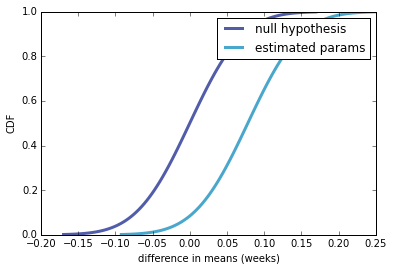

In [18]:
%matplotlib inline
import thinkstats2
import math
import thinkplot

PlotPregLengths(live, first, others)

In [7]:
def SamplingDistMean(data, n):
    """Computes the sampling distribution of the mean.

    data: sequence of values representing the population
    n: sample size

    returns: Normal object
    """
    mean, var = data.mean(), data.var()
    dist = Normal(mean, var)
    return dist.Sum(n) / n
